<a href="https://colab.research.google.com/github/adbioc/Spectroscopy/blob/main/spectra_smooth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import networkx as nx
from sklearn.preprocessing import StandardScaler

In [ ]:
os.chdir("/content/drive/My Drive/my_book/book_mypython")



In [ ]:
import plotly.graph_objects as go

import numpy as np
import pandas as pd
import scipy

from scipy import signal

np.random.seed(1)

x = np.linspace(0, 10, 100)
y = np.sin(x)
noise = 2 * np.random.random(len(x)) - 1 # uniformly distributed between -1 and 1
y_noise = y + noise

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(size=2, color='black'),
    name='Sine'
))

fig.add_trace(go.Scatter(
    x=x,
    y=y_noise,
    mode='markers',
    marker=dict(
        size=6,
        color='royalblue',
        symbol='circle-open'
    ),
    name='Noisy Sine'
))

fig.add_trace(go.Scatter(
    x=x,
    y=signal.savgol_filter(y,
                           53, # window size used for filtering
                           3), # order of fitted polynomial
    mode='markers',
    marker=dict(
        size=6,
        color='mediumpurple',
        symbol='triangle-up'
    ),
    name='Savitzky-Golay'
))


fig.show()


In [ ]:
#https://www.mikulskibartosz.name/smoothing-time-series-in-python-using-savitzky-golay-filter/
schl=pd.read_csv("chl_filtered.csv")
list(schl)


['Unnamed: 0',
 'd1M',
 'd1S',
 'd2M',
 'd2S',
 'd3M',
 'd3S',
 'd4M',
 'd4S',
 'd5M',
 'd5S',
 'd6M',
 'd6S',
 'd7M',
 'd7S',
 'd10M',
 'd10S',
 'nm']

In [67]:
from scipy import signal
from scipy.signal import savgol_filter
lam=schl['nm']
i=1
L=list(schl)
LL=L[1:16:2]


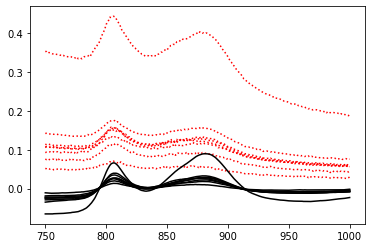

In [68]:

for i in LL:
  spec = schl[i]
  plt.plot(lam,spec,'r:')
  btc={}
  btcd={}
  btcd = { 
    'lam' : lam, 
    'inten' : spec, 
  } 
  
# creating a Dataframe object  
  btc = pd.DataFrame(btcd) 
  
# btc
#smoothed_2dg = savgol_filter(btc, window_length = 5, polyorder = 2)
# # smoothed_2dg

  smoothed_1dg = savgol_filter(btc['inten'], window_length = 9, polyorder = 1)
# # smoothed_1dg
  ys=signal.detrend(smoothed_1dg)
  plt.plot(lam,ys,'k-')
plt.show()


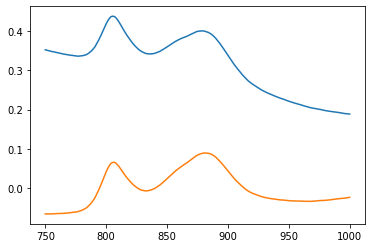

In [60]:
from scipy import signaly_detrended = signal.detrend(ys)

plt.plot(lam,ys)
plt.plot(lam,y_detrended)